In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv("data/summary_real.csv", index_col=0)


In [3]:
def visualze_thresholded(matrix, alpha=0.05):
    a = np.absolute(matrix)
    Z = a >= 1 - alpha
    sns.heatmap(Z)


I visualized the cross correlation of the different features using the heatmap function from seaborn. The heatmap function takes a matrix as input and visualizes it as a heatmap. The color of the cell indicates the value of the cell. The darker the color, the higher the value. The lighter the color, the lower the value. The diagonal of the matrix is always white, because the correlation of a feature with itself is always 1.

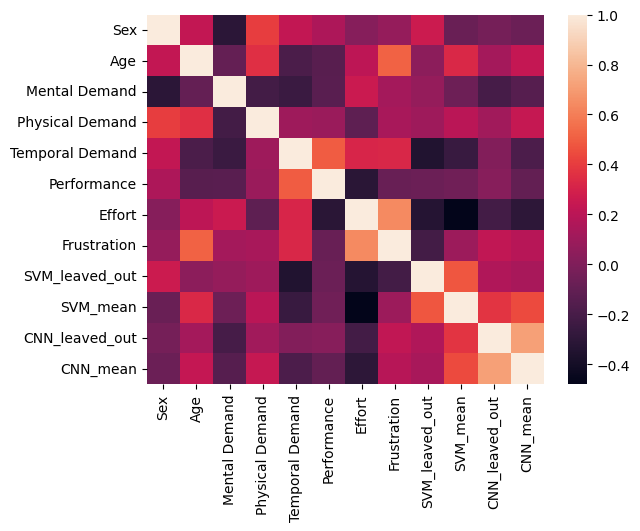

In [4]:
_ = sns.heatmap(data.corr(method = 'pearson')) #Pearson correlation

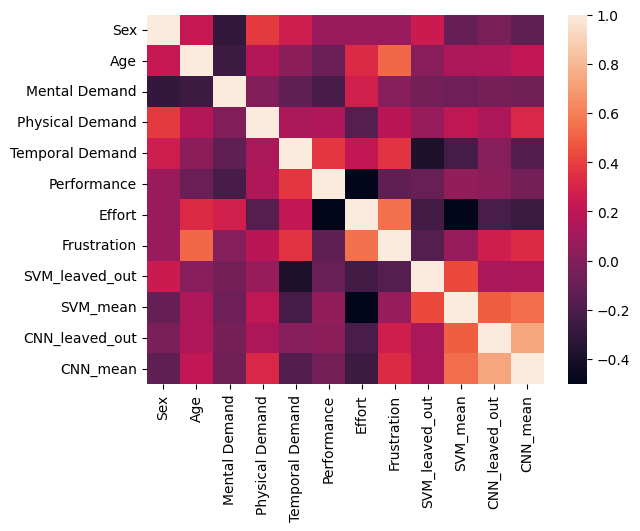

In [5]:
_ = sns.heatmap(data.corr(method='spearman')) #Spearman correlation

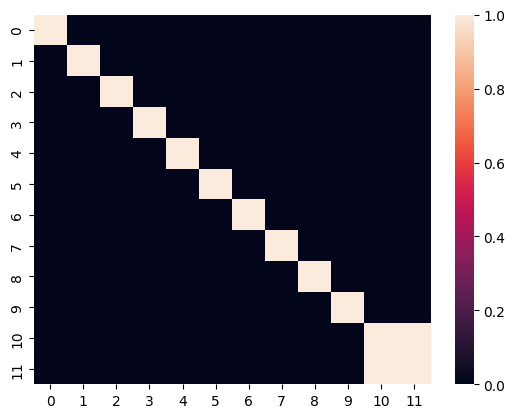

In [6]:
# I higlighted the highest correlations in the heatmap
visualze_thresholded(np.array(data.corr(method='spearman')), alpha = 0.3)

[Comment]: We can see relativly strong correlation between the 2 CNN columns, it is the expected behaviour of a robust model. Since the SVM lacks simmilar correlation we can assume that these models overfitted.

In [7]:
cnn_corr = data.iloc[:,10].corr(data.iloc[:,11], method='pearson')
print(f'Correlation between [CNN_leaved_out] and [CNN_mean] is {round(cnn_corr,3)}')

Correlation between [CNN_leaved_out] and [CNN_mean] is 0.717


[Comment]: Lowering the threshold we can find some weak correlation between some fields:

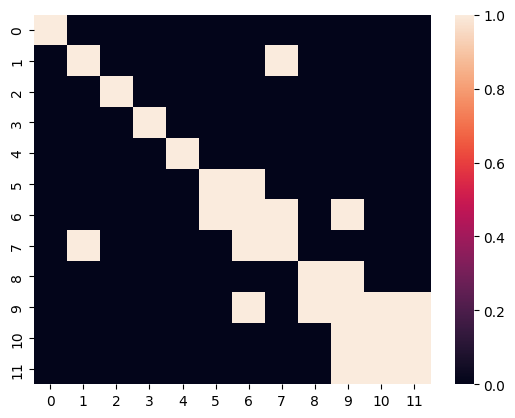

In [13]:
visualze_thresholded(np.array(data.corr(method='spearman')), alpha = 0.6)

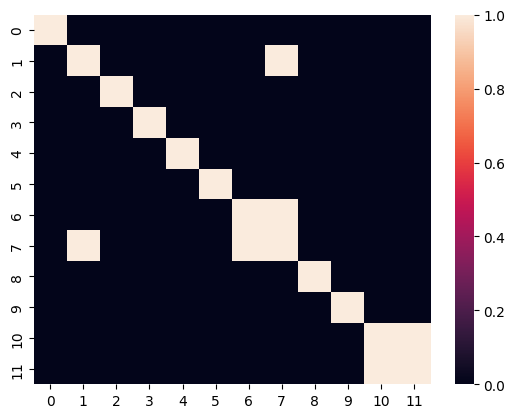

In [14]:
visualze_thresholded(np.array(data.corr(method='pearson')), alpha = 0.5)

In [15]:
corr = data.iloc[:,7].corr(data.iloc[:,1], method='pearson')
print(f'Correlation between [Frustration] and [Age] is {round(corr,3)}')

Correlation between [Frustration] and [Age] is 0.511


In [16]:
corr = data.iloc[:,7].corr(data.iloc[:,6], method='pearson')
print(f'Correlation between [Frustration] and [Effort] is {round(corr,3)}')

Correlation between [Frustration] and [Effort] is 0.637


In [17]:
corr = data.iloc[:,5].corr(data.iloc[:,10], method='pearson')
print(f'Correlation between [Performance] and [CNN_leaved_out] is {round(corr,3)}')

Correlation between [Performance] and [CNN_leaved_out] is 0.024


In [19]:
corr = data.iloc[:,5].corr(data.iloc[:,11], method='pearson')
print(f'Correlation between [Performance] and [CNN_mean] is {round(corr,3)}')

Correlation between [Performance] and [CNN_mean] is -0.101
